The tutorial is at https://www.tensorflow.org/tutorials/keras/basic_regression

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

print(tf.__version__)

1.10.0


In [2]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
for x in [train_data, train_labels, test_data, test_labels]:
    print(x.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [3]:
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]
for x in [train_data, train_labels, test_data, test_labels]:
    print(x.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
train_data[0]

array([7.8750e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01,
       6.7820e+00, 4.1100e+01, 3.7886e+00, 5.0000e+00, 3.9800e+02,
       1.5200e+01, 3.9387e+02, 6.6800e+00])

In [31]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [6]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [32]:
print('mean=', mean, ", std=", std)

mean= [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01] , std= [9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [34]:
print(test_labels)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [7]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [8]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if (epoch % 100 == 0):
            print('')
        print('.', end='')
            

In [13]:
history = model.fit(train_data, train_labels, epochs = 500,
                   validation_split = 0.2, verbose = 0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [14]:
import matplotlib.pyplot as plt

def plot(history, metric):
	train_metric = history.history[metric]
	val_metric = history.history['val_' + metric]
	epochs = range(1, len(history.epoch)+1)
	plt.plot(epochs, train_metric, 'bo', label='Training ' + metric)
	plt.plot(epochs, val_metric, 'b', label='Validation ' + metric)
	plt.title('Training and Validation ' + metric)
	plt.xlabel('Epochs')
	plt.ylabel(metric)
	plt.legend()
	plt.show()

In [18]:
len(history.epoch)
for key in history.history:
    print(key)

val_loss
val_mean_absolute_error
loss
mean_absolute_error


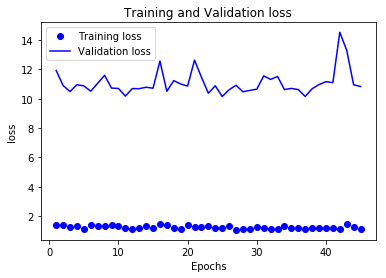

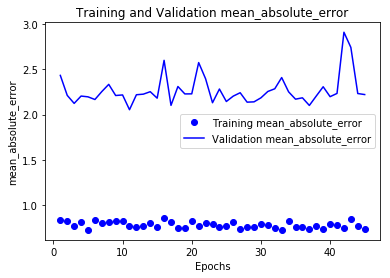

In [21]:
plot(history, 'loss')
plot(history, 'mean_absolute_error')

In [26]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=500,
                   validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

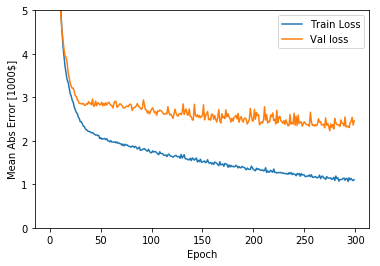

In [27]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

In [29]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print (mae*1000)

2676.2748325572297


In [30]:
test_predictions = model.predict(test_data).flatten()
print(test_predictions)

[ 9.885587  19.481512  22.198696  35.604324  25.80843   23.285376
 27.012335  21.900812  20.566164  23.12688   24.941978  16.858725
 16.334028  42.902737  21.52157   20.750273  26.173384  18.223925
 20.65071   27.733488  12.04533   14.971503  22.389822  15.87551
 16.67615   25.574282  29.934175  30.541397  12.203216  19.886473
 20.083841  17.19797   33.357216  24.2992    21.112211   8.1195545
 18.413033  16.640364  18.577711  26.671335  33.733253  28.014032
 13.934089  42.6305    30.458506  27.46561   27.839167  19.63694
 23.942797  23.614288  36.654095  20.365923  10.607762  14.818755
 34.959663  28.853619  12.643178  48.133495  33.743736  25.52552
 25.033152  16.179148  15.9712515 20.732311  24.325346  20.325678
 15.467034  21.739225  11.994011   9.463901  27.507105  30.059237
 28.008265  12.654889  25.810417  19.356163  19.399923  25.031359
 34.981773   9.864607  22.805223  37.713547  16.293137  14.956367
 16.780657  18.23509   21.177666  22.129341  22.085722  33.47577
 21.195381  1